In [1]:
import os
import sys
import librosa
import scipy
import scipy.signal as sig
import scipy.io.wavfile as scw
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Existing Function

In [2]:
# read audio data
signal, fs = librosa.load(os.path.join('speech_sample', 'short_1.wav'), sr=16000)
t = np.arange(0, len(signal) / fs, 1/fs)

n_fft      = fs * 16 // 1000 # sample number of FFT. default =2048
hop_length = fs * 8 // 1000  # default = n_fft /4 = 512

In [3]:
mfccs = librosa.feature.mfcc(signal, sr=fs, n_mfcc=20, n_fft=n_fft, hop_length = hop_length)
mfccs = np.average(mfccs, axis = 1)
mfccs = mfccs.flatten()
mfccs = mfccs.tolist()
print(mfccs)

[-606.1349487304688, -3.3550221920013428, 61.83603286743164, 86.69495391845703, 16.445829391479492, 2.749673366546631, -3.2778878211975098, -24.009492874145508, 4.596224784851074, -14.530194282531738, -16.66118812561035, 21.411727905273438, -13.624351501464844, -12.256974220275879, 5.325709342956543, -14.197894096374512, -16.023700714111328, 7.1545090675354, -5.994050979614258, -11.780981063842773]


/home/takkan/miniconda3/envs/speech_split/lib/python3.7/site-packages/librosa/filters.py:222: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


In [4]:
mfcc_test = librosa.feature.mfcc(signal, sr=fs, n_mfcc=20, n_fft=n_fft, hop_length = hop_length)
print(mfcc_test.shape)
print(mfcc_test[0])

(20, 46)
[-777.3404  -719.6109  -711.7442  -671.1474  -668.1985  -643.6854
 -622.75574 -599.2157  -599.11755 -602.37317 -581.8451  -590.94867
 -647.40027 -706.9787  -713.02234 -706.2428  -754.13837 -763.76404
 -749.07605 -602.7455  -616.9605  -608.8243  -564.0775  -588.9443
 -578.4311  -579.4104  -539.3381  -519.32587 -494.1392  -484.92825
 -490.7265  -491.78006 -483.03787 -490.12866 -499.88098 -512.76227
 -534.3546  -512.31757 -504.84973 -538.5007  -577.7106  -565.7672
 -628.71686 -673.0881  -696.3992  -676.4577 ]


In [18]:
result = np.zeros((mfcc_test.shape[0], 2))
result[:,0] = np.mean(mfcc_test, axis=1)
result[:,1] = np.var(mfcc_test, axis=1)
print(result)

[[-6.06134949e+02  7.21260449e+03]
 [-3.35502219e+00  3.70553271e+03]
 [ 6.18360329e+01  9.87014343e+02]
 [ 8.66949539e+01  1.23063513e+03]
 [ 1.64458294e+01  1.46316010e+02]
 [ 2.74967337e+00  3.40675079e+02]
 [-3.27788782e+00  2.38855484e+02]
 [-2.40094929e+01  2.92954193e+02]
 [ 4.59622478e+00  1.05619492e+02]
 [-1.45301943e+01  3.73699890e+02]
 [-1.66611881e+01  1.29825638e+02]
 [ 2.14117279e+01  2.96833832e+02]
 [-1.36243515e+01  1.26770012e+02]
 [-1.22569742e+01  1.16314041e+02]
 [ 5.32570934e+00  1.60394226e+02]
 [-1.41978941e+01  5.46941719e+01]
 [-1.60237007e+01  1.24480499e+02]
 [ 7.15450907e+00  9.96259155e+01]
 [-5.99405098e+00  6.11094055e+01]
 [-1.17809811e+01  7.81447144e+01]]


## preEmphasis

In [5]:
def preEmphasis(signal, p):
    """pre-Emphasis filter"""
    return sig.lfilter([1.0, -p], 1, signal)

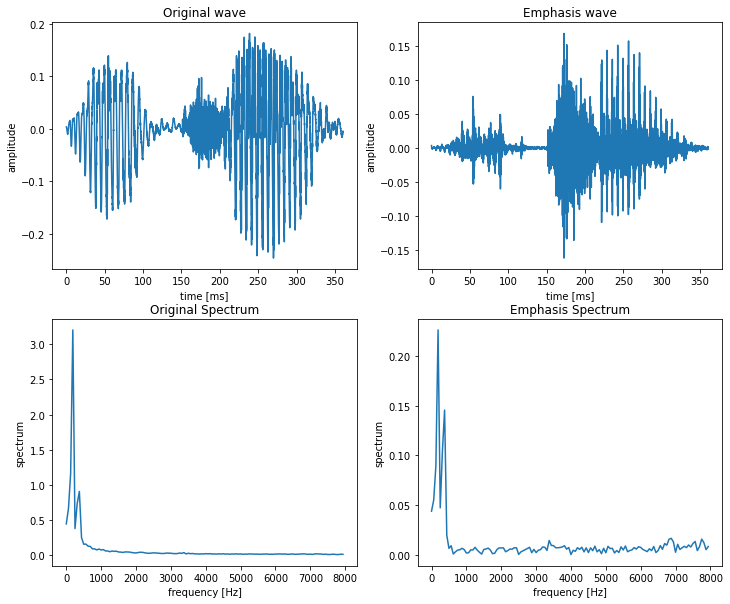

In [6]:
fig = plt.figure(figsize=(12,10))
ax1 = plt.subplot2grid((2,2), (0,0))
ax2 = plt.subplot2grid((2,2), (1,0))
ax3 = plt.subplot2grid((2,2), (0,1))
ax4 = plt.subplot2grid((2,2), (1,1))

ax1.plot(t * 1000, signal)
ax1.set_xlabel("time [ms]")
ax1.set_ylabel("amplitude")
ax1.set_title("Original wave")

spec = np.abs(np.fft.fft(signal, n_fft))[:n_fft//2]
fscale = np.fft.fftfreq(n_fft, d = 1.0 / fs)[:n_fft//2]
ax2.plot(fscale, spec)
ax2.set_xlabel("frequency [Hz]")
ax2.set_ylabel("spectrum")
ax2.set_title("Original Spectrum")

# pre-Emphasis filter
p = 0.97
signal_empha = preEmphasis(signal, p)
ax3.plot(t * 1000, signal_empha)
ax3.set_xlabel("time [ms]")
ax3.set_ylabel("amplitude")
ax3.set_title("Emphasis wave")

spec_empha = np.abs(np.fft.fft(signal_empha, n_fft))[:n_fft//2]
fscale_empha = np.fft.fftfreq(n_fft, d = 1.0 / fs)[:n_fft//2]
ax4.plot(fscale_empha, spec_empha)
ax4.set_xlabel("frequency [Hz]")
ax4.set_ylabel("spectrum")
ax4.set_title("Emphasis Spectrum")

fig.show()

## hamming window

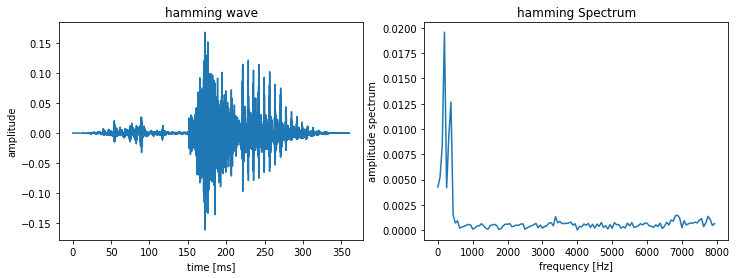

In [7]:
hammingWindow = np.hamming(len(signal_empha))
signal_hamm = signal_empha * hammingWindow

spec_hamm = np.abs(np.fft.fft(signal_hamm, n_fft))[:n_fft//2]
fscale_hamm = np.fft.fftfreq(n_fft, d = 1.0 / fs)[:n_fft//2]

fig, (axL, axR) = plt.subplots(ncols=2, figsize=(12,4))

axL.plot(t * 1000, signal_hamm)
axL.set_xlabel("time [ms]")
axL.set_ylabel("amplitude")
axL.set_title("hamming wave")

axR.plot(fscale_hamm, spec_hamm)
axR.set_xlabel("frequency [Hz]")
axR.set_ylabel("amplitude spectrum")
axR.set_title("hamming Spectrum")

fig.show()

## mel-Filter Bank

In [8]:
f0 = 700
m0 = 2595

def hz2mel(f):
    """convert Hz to mel"""
    return m0 * np.log(f / f0 + 1.0)

def mel2hz(m):
    """convert mel to Hz"""
    return f0 * (np.exp(m / m0) - 1.0)

def melFilterBank(fs, N, numChannels):
    # Nyquist frequency（Hz）
    fmax = fs / 2
    # Nyquist frequency（mel）
    melmax = hz2mel(fmax)
    # Max frequency index
    nmax = N // 2
    # Hz width per frequency index 1
    df = fs / N
    # Find the center frequency of each filter on the Mel scale
    dmel = melmax / (numChannels + 1)
    melcenters = np.arange(1, numChannels + 1) * dmel
    # Convert the center frequency of each filter to Hz
    fcenters = mel2hz(melcenters)
    # Convert the center frequency of each filter to a frequency index
    indexcenter = np.round(fcenters / df)
    # Index of the start position of each filter
    indexstart = np.hstack(([0], indexcenter[0:numChannels - 1]))
    # Index of the end position of each filter
    indexstop = np.hstack((indexcenter[1:numChannels], [nmax]))
    filterbank = np.zeros((numChannels, nmax))
    print(indexstop)
    for c in range(0, numChannels):
        # Find the point from the slope of the straight line to the left of the triangular filter
        increment= 1.0 / (indexcenter[c] - indexstart[c])
        for i in range(int(indexstart[c]), int(indexcenter[c])):
            filterbank[c, i] = (i - indexstart[c]) * increment
        # Find the point from the slope of the straight line to the right of the triangular filter
        decrement = 1.0 / (indexstop[c] - indexcenter[c])
        for i in range(int(indexcenter[c]), int(indexstop[c])):
            filterbank[c, i] = 1.0 - ((i - indexcenter[c]) * decrement)

    return filterbank, fcenters

[  3.   5.   7.   9.  12.  15.  18.  22.  26.  31.  36.  42.  49.  57.
  65.  75.  86.  98. 112. 128.]


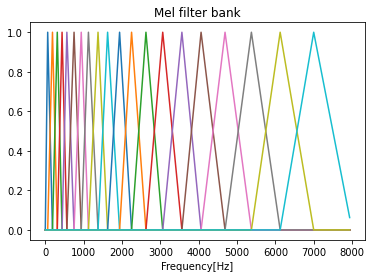

In [9]:
numChannels = 20
df = fs / n_fft
filterbank, fcenters = melFilterBank(fs, n_fft, numChannels)

for c in np.arange(0, numChannels):
    plt.plot(np.arange(0, n_fft / 2) * df, filterbank[c])

plt.title('Mel filter bank')
plt.xlabel('Frequency[Hz]')
plt.show()

In [10]:
mspec = np.dot(spec_hamm, filterbank.T)

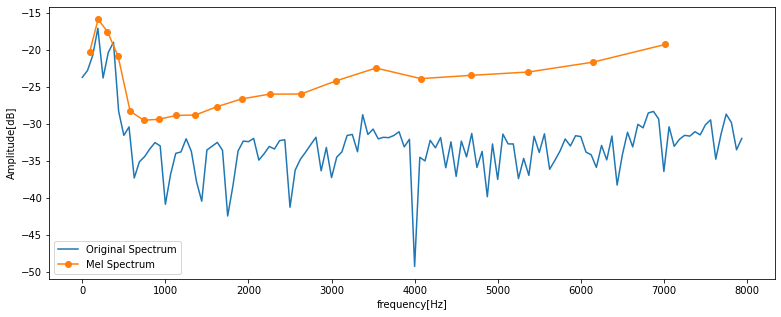

In [11]:
plt.figure(figsize=(13, 5))

plt.plot(fscale_hamm, 10* np.log10(spec_hamm), label='Original Spectrum')
plt.plot(fcenters, 10 * np.log10(mspec), "o-", label='Mel Spectrum')
plt.xlabel("frequency[Hz]")
plt.ylabel('Amplitude[dB]')
plt.legend()
plt.show()

In [12]:
from scipy.fftpack.realtransforms import dct

nceps = 20

ceps = dct(10 * np.log10(mspec), type=2, norm="ortho", axis=-1)
mfcc = ceps[:nceps]
print(mfcc)

[-1.08107185e+02 -1.93410878e-01  1.39811232e+01  7.45508015e+00
  4.13558398e+00 -1.27826524e+00 -1.04090765e+00 -4.76361385e+00
 -1.89469807e+00 -3.18100177e+00 -1.72969436e+00 -3.35018917e-02
  2.46143870e-01 -7.27088600e-01  4.44450165e-01 -9.21653545e-01
 -8.34933742e-01 -6.17400217e-01 -1.21193039e+00 -5.15297086e-01]
